In [26]:
import sys, os
# Note that the path ./Albedo_project/data_processing is now in the path
import xarray as xr

# Local Imports
curdir = os.getcwd()
#print(curdir)
sys.path.insert(0, curdir+"/../data_processing")
sys.path.insert(0, curdir+"/../visualization")
import ceres_ebaf
import ceres_ebaf_plotting

In [27]:
current_month_folder="June23"
file_name = "/Users/mawa7160/dev/data/CERES/EBAF/CERES_EBAF-TOA_Ed4.2_Subset_200003-202303.nc"
full_years = xr.open_dataset(file_name)

In [63]:
solar_in = ceres_ebaf.create_hemisphere_data(full_years["solar_mon"], time_weighting=1, end_yr="2023")
shortwave_all_sky = ceres_ebaf.create_hemisphere_data(full_years["toa_sw_all_mon"], time_weighting=1, end_yr="2023")
shortwave_clear_sky = ceres_ebaf.create_hemisphere_data(full_years["toa_sw_clr_c_mon"], time_weighting=1, end_yr="2023")
cre_total = shortwave_all_sky-shortwave_clear_sky

solar_diff = solar_in["nh"]-solar_in["sh"]
cre_diff = cre_total["nh"]-cre_total["sh"]
clear_sky_diff = shortwave_clear_sky["nh"]-shortwave_clear_sky["sh"]
all_sky_diff = shortwave_all_sky["nh"]-shortwave_all_sky["sh"]

## Shortwave Radiation Budget Values

In [1]:
# Plotting the all sky difference in SW
ceres_ebaf_plotting.plot_data_with_reg_line(all_sky_diff.year, all_sky_diff, title="Hemispheric All Sky Albedo Difference (NH-SH)",
                        include_trends=True, y_label="Albedo Difference W/m^2", tick_color="blue")
#plt.savefig("./Figs/"+current_month_folder+"/All-Sky-Difference")

NameError: name 'ceres_ebaf_plotting' is not defined

Hemispheric Clear Sky Albedo Difference (NH-SH) -0.041 W/m^2 per Year. With R^2 0.4373837701931091


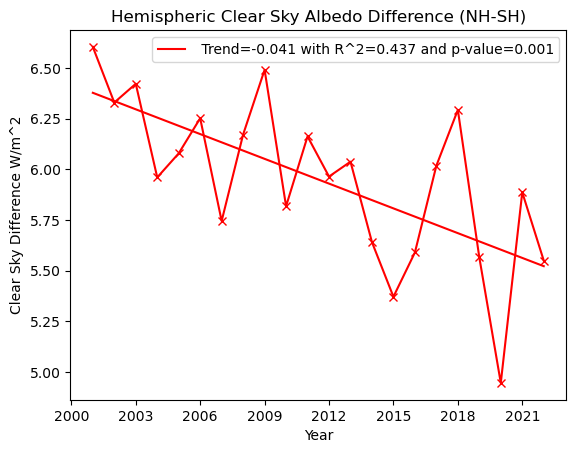

In [49]:
# Plotting the clear sky difference in SW
ceres_ebaf_plotting.plot_data_with_reg_line(clear_sky_diff.year, clear_sky_diff, title="Hemispheric Clear Sky Albedo Difference (NH-SH)", 
                        include_trends=True, y_label="Clear Sky Difference W/m^2", tick_color="red")
#plt.savefig("./Figs/"+current_month_folder+"/Clear-Sky-Difference")

Hemispheric Cloud Radiative Effect (CRE) Difference (NH-SH) 0.02 W/m^2 per Year. With R^2 0.1254397882832873


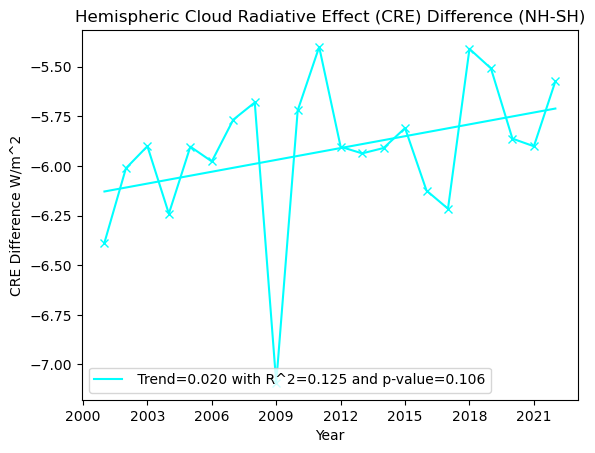

In [50]:
# Plotting the CRE difference
ceres_ebaf_plotting.plot_data_with_reg_line(cre_diff.year, cre_diff, title="Hemispheric Cloud Radiative Effect (CRE) Difference (NH-SH)", 
                        include_trends=True, y_label="CRE Difference W/m^2", tick_color="cyan")
#plt.savefig("./Figs/"+current_month_folder+"/CRE-Difference")

## Longwave Radiation

In [51]:
lw_all_sky = ceres_ebaf.create_hemisphere_data(full_years["toa_lw_all_mon"], time_weighting=2, end_yr="2023")
lw_clear_sky = ceres_ebaf.create_hemisphere_data(full_years["toa_lw_clr_c_mon"], time_weighting=2, end_yr="2023")

lw_all_diff = lw_all_sky["nh"]-lw_all_sky["sh"]
lw_clear_diff = lw_clear_sky["nh"]-lw_clear_sky["sh"]

Hemispheric Longwave All Sky Difference (NH-SH) 0.021 W/m^2 per Year. With R^2 0.10071995726765381


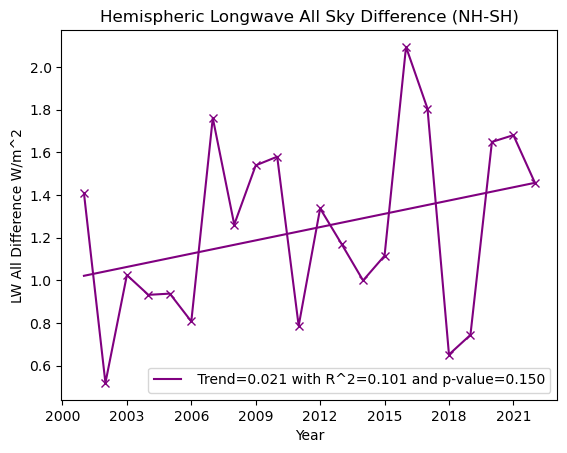

In [52]:
# Plotting the CRE difference
ceres_ebaf_plotting.plot_data_with_reg_line(lw_all_diff.year, lw_all_diff, title="Hemispheric Longwave All Sky Difference (NH-SH)", 
                        include_trends=True, y_label="LW All Difference W/m^2", tick_color="purple")
#plt.savefig("./Figs/"+current_month_folder+"/Cld-Frac-Difference")

Hemispheric Longwave Clear Sky Difference (NH-SH) 0.03 W/m^2 per Year. With R^2 0.34548745674818115


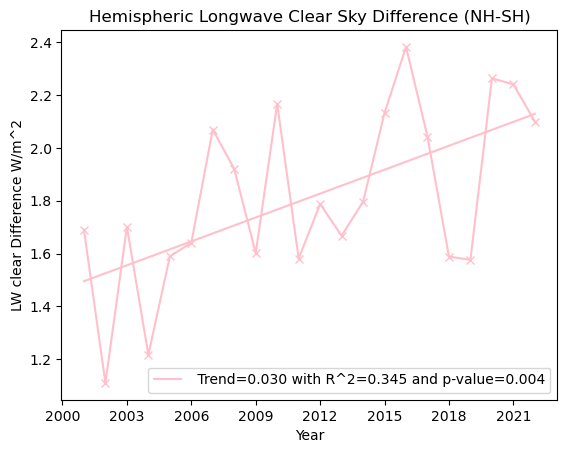

In [53]:
# Plotting the CRE difference
ceres_ebaf_plotting.plot_data_with_reg_line(lw_clear_diff.year, lw_clear_diff, title="Hemispheric Longwave Clear Sky Difference (NH-SH)", 
                        include_trends=True, y_label="LW clear Difference W/m^2", tick_color="pink")
#plt.savefig("./Figs/"+current_month_folder+"/Cld-Frac-Difference")

## Net Radiation

In [54]:
net_all_sky = ceres_ebaf.create_hemisphere_data(full_years["toa_lw_all_mon"], time_weighting=2, end_yr="2023")
net_clear_sky = ceres_ebaf.create_hemisphere_data(full_years["toa_lw_clr_c_mon"], time_weighting=2, end_yr="2023")

net_all_diff = net_all_sky["nh"]-net_all_sky["sh"]
net_clear_diff = net_clear_sky["nh"]-net_clear_sky["sh"]

Hemispheric Net All Sky Difference (NH-SH) 0.021 W/m^2 per Year. With R^2 0.10071995726765381


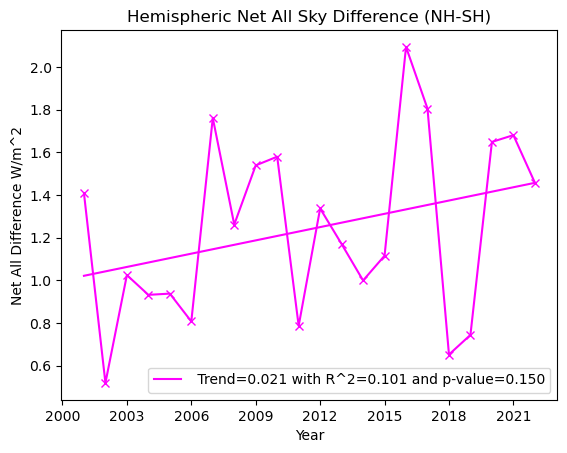

In [55]:
# Plotting the CRE difference
ceres_ebaf_plotting.plot_data_with_reg_line(net_all_diff.year, net_all_diff, title="Hemispheric Net All Sky Difference (NH-SH)", 
                        include_trends=True, y_label="Net All Difference W/m^2", tick_color="magenta")
#plt.savefig("./Figs/"+current_month_folder+"/Net-All-Difference")

Hemispheric Net Clear Sky Difference (NH-SH) 0.03 W/m^2 per Year. With R^2 0.34548745674818115


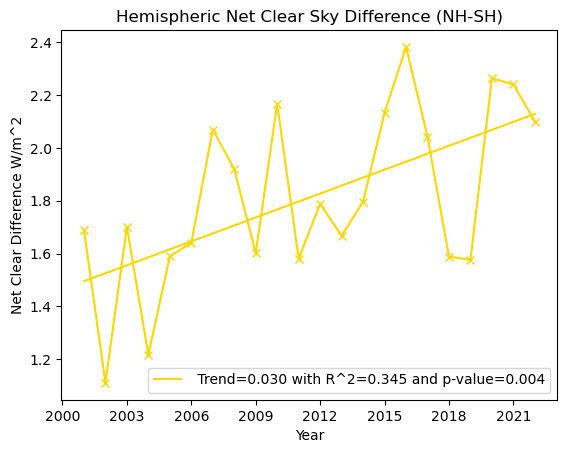

In [56]:
# Plotting the CRE difference
ceres_ebaf_plotting.plot_data_with_reg_line(net_clear_diff.year, net_clear_diff, title="Hemispheric Net Clear Sky Difference (NH-SH)", 
                        include_trends=True, y_label="Net Clear Difference W/m^2", tick_color="gold")
#plt.savefig("./Figs/"+current_month_folder+"/Net-Clear-Difference")

## Cloud Properties

In [57]:
cloud_fraction = ceres_ebaf.create_hemisphere_data(full_years["cldarea_total_daynight_mon"], time_weighting=2, end_yr="2023")
cloud_optical_depth = ceres_ebaf.create_hemisphere_data(full_years["cldtau_total_day_mon"], time_weighting=2, end_yr="2023")
cloud_temp = ceres_ebaf.create_hemisphere_data(full_years["cldtemp_total_daynight_mon"], time_weighting=2, end_yr="2023")
cloud_press = ceres_ebaf.create_hemisphere_data(full_years["cldpress_total_daynight_mon"], time_weighting=2, end_yr="2023")

cloud_frac_diff = cloud_fraction["nh"]-cloud_fraction["sh"]
cloud_tau_diff = cloud_optical_depth["nh"]-cloud_optical_depth["sh"]
cloud_temp_diff = cloud_temp["nh"]-cloud_temp["sh"]

Hemispheric Cloud Fraction Difference (NH-SH) 0.015 W/m^2 per Year. With R^2 0.0691118288120167


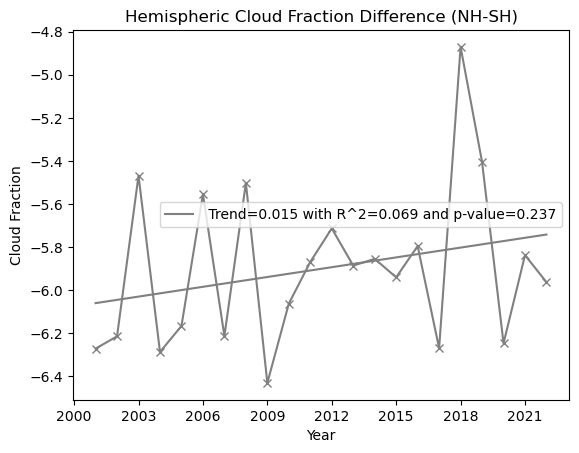

In [58]:
# Plotting the CRE difference
ceres_ebaf_plotting.plot_data_with_reg_line(cloud_frac_diff.year, cloud_frac_diff, title="Hemispheric Cloud Fraction Difference (NH-SH)", 
                        include_trends=True, y_label="Cloud Fraction", tick_color="gray")
#plt.savefig("./Figs/"+current_month_folder+"/Cld-Frac-Difference")

Hemispheric Cloud Optical Depth Difference (NH-SH) -0.004 W/m^2 per Year. With R^2 0.4457915544543972


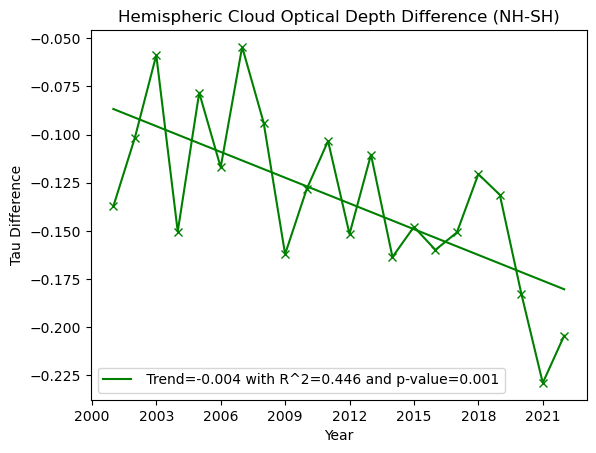

In [59]:
# Plotting the CRE difference
ceres_ebaf_plotting.plot_data_with_reg_line(cloud_tau_diff.year, cloud_tau_diff, title="Hemispheric Cloud Optical Depth Difference (NH-SH)", 
                        include_trends=True, y_label="Tau Difference", tick_color="green")
#plt.savefig("./Figs/"+current_month_folder+"/Cld-Tau-Difference")

Hemispheric Cloud Temp Difference (NH-SH) 0.01 W/m^2 per Year. With R^2 0.06580686067770977


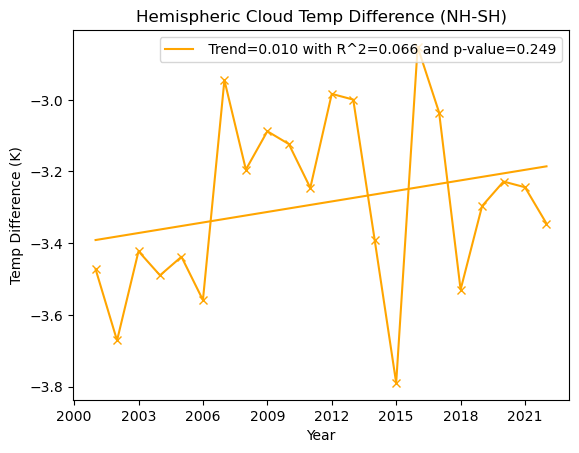

In [60]:
# Plotting the CRE difference
ceres_ebaf_plotting.plot_data_with_reg_line(cloud_temp_diff.year, cloud_temp_diff, title="Hemispheric Cloud Temp Difference (NH-SH)", 
                        include_trends=True, y_label="Temp Difference (K)", tick_color="orange")
#plt.savefig("./Figs/"+current_month_folder+"/Cld-Temp-Difference")

# Solar for Visibility

Hemispheric Solar Insolation Difference (NH-SH) 0.001 W/m^2 per Year. With R^2 0.11884940052068228


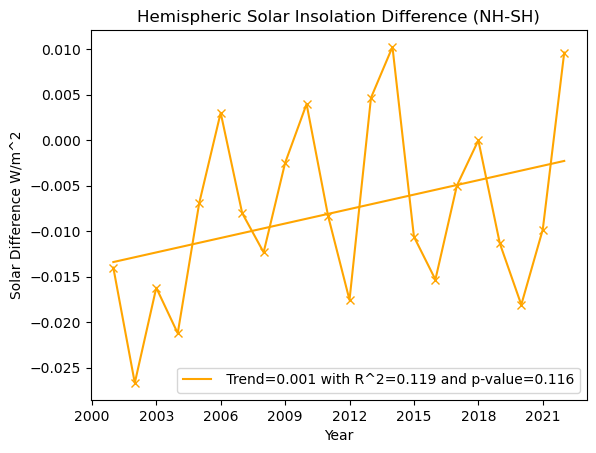

In [64]:
# Plotting the CRE difference
ceres_ebaf_plotting.plot_data_with_reg_line(solar_in.year, solar_diff, title="Hemispheric Solar Insolation Difference (NH-SH)", 
                        include_trends=True, y_label="Solar Difference W/m^2", tick_color="orange")
#plt.savefig("./Figs/"+current_month_folder+"/Cld-Temp-Difference")

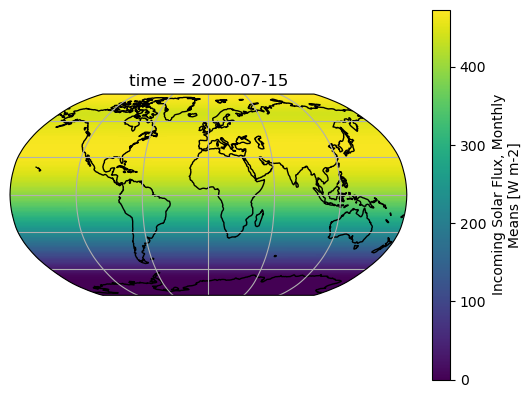

In [62]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

plt.figure()
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
full_years["solar_mon"][4].plot(ax=ax, transform=ccrs.PlateCarree())
plt.show()

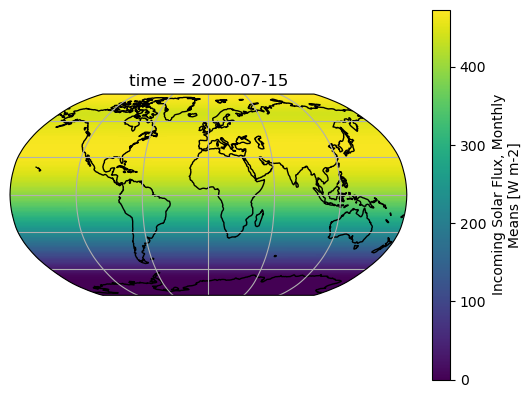

In [44]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

plt.figure()
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
full_years["solar_mon"][4].plot(ax=ax, transform=ccrs.PlateCarree())
plt.show()